# ADS 509 Module 3: Group Comparison 

## Sindhu Bhattarai

### Assignment 3.1


The task of comparing two groups of text is fundamental to textual analysis. There are innumerable applications: survey respondents from different segments of customers, speeches by different political parties, words used in Tweets by different constituencies, etc. In this assignment you will build code to effect comparisons between groups of text data, using the ideas learned in reading and lecture.

This assignment asks you to analyze the lyrics and Twitter descriptions for the two artists you selected in Module 1. If the results from that pull were not to your liking, you are welcome to use the zipped data from the “Assignment Materials” section. Specifically, you are asked to do the following: 

* Read in the data, normalize the text, and tokenize it. When you tokenize your Twitter descriptions, keep hashtags and emojis in your token set. 
* Calculate descriptive statistics on the two sets of lyrics and compare the results. 
* For each of the four corpora, find the words that are unique to that corpus. 
* Build word clouds for all four corpora. 

Each one of the analyses has a section dedicated to it below. Before beginning the analysis there is a section for you to read in the data and do your cleaning (tokenization and normalization). 


In [1]:
#pip install wordcloud

In [2]:
import os
import re
import emoji
import pandas as pd

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation
from wordcloud import WordCloud 

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer


In [3]:
# Use this space for any additional import statements you need



In [4]:
# Place any addtional functions or constants you need here. 

# Some punctuation variations
punctuation = set(punctuation) # speeds up comparison
tw_punct = punctuation - {"#"}

# Stopwords
sw = stopwords.words("english")

# Two useful regex
whitespace_pattern = re.compile(r"\s+")
hashtag_pattern = re.compile(r"^#[0-9a-zA-Z]+")

# # It's handy to have a full set of emojis

all_language_emojis = set()

for country in emoji.EMOJI_DATA : 
    for em in emoji.EMOJI_DATA[country] : 
        all_language_emojis.add(em)


# and now our functions
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity, and num_tokens most common
        tokens. Return a list of 
    """
    #filled na with whitespace to work with df and making sure it will
    #not be counted on frequent words
    tokens = [token for token in tokens if token not in ['', " "]]
    # Fill in the correct values here. 
    num_tokens =  len(tokens)
    num_unique_tokens = len(set(tokens)) #len(np.unique(tokens))
    lexical_diversity =  len(set(tokens)) / len(tokens) 
    num_characters =  sum([len(i) for i in tokens]) 
    top_5_tokens =(Counter(tokens).most_common(5))
    
    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
        print(f"The top five common works are :{top_5_tokens}.")
    
        
    return 


def common_tokens(tokens):
    return (Counter(tokens).most_common())

    
def is_emoji(s):
    return(emoji.is_emoji(s))

def contains_emoji(s):    
    s = str(s)
    emojis = [ch for ch in s if is_emoji(ch)]

    return(len(emojis) > 0)


def remove_stop(text, stop_words = sw) :
     # modify this function to remove stopwords
    return(" ".join([word for word in text.split(' ') if word not in stop_words ]))
 
def remove_punctuation(text, punct_set=tw_punct) : 
    return("".join([ch for ch in text if ch not in punct_set]))

def tokenize(text) : 
    """ Splitting on whitespace rather than the book's tokenize function. That 
        function will drop tokens like '#hashtag' or '2A', which we need for Twitter. """
    text = text.split(" ")
    # modified this function to return tokens of word only 
    return([words for words in text if words != ''])

def remove_song_title(s): 
    location =  (re.findall(r'"(.*?)"', s)[0])
    return s.replace(location, '')

def lower_case(text):
    return text.casefold()

def prepare(text, pipeline) : 
    tokens = str(text)
    
    for transform in pipeline : 
        tokens = transform(tokens)
        
    return(tokens)


## Data Ingestion

Use this section to ingest your data into the data structures you plan to use. Typically this will be a dictionary or a pandas DataFrame.

In [5]:
# Feel fre to use the below cells as an example or read in the data in a way you prefer
# change to your location if it is not in the same directory as your notebook

data_location = "" 
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

artist_files = {'cher':'cher_followers_data.txt',
                'robyn':'robynkonichiwa_followers_data.txt'}


In [6]:
twitter_data = pd.read_csv(data_location + twitter_folder + artist_files['cher'],
                           sep="\t",
                           quoting=3)

twitter_data['artist'] = "cher"

In [7]:
#twitter_data

In [8]:
twitter_data_2 = pd.read_csv(data_location + twitter_folder + artist_files['robyn'],
                             sep="\t",
                             quoting=3)
twitter_data_2['artist'] = "robyn"

twitter_data = pd.concat([
    twitter_data,twitter_data_2])
    
del(twitter_data_2)

In [9]:
twitter_data.head(5)

,screen_name,name,id,location,followers_count,friends_count,description,artist
0,hsmcnp,Country Girl,35152213,NaN,1302,1014,NaN,cher
1,horrormomy,Jeny,742153090850164742,Earth,81,514,𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜,cher
2,anju79990584,anju,1496463006451974150,NaN,13,140,163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡,cher
3,gallionjenna,J,3366479914,NaN,752,556,csu,cher
4,bcscomm,bcscomm,83915043,"Washington, DC",888,2891,Writer @Washinformer @SpelmanCollege alumna #D...,cher


In [10]:
twitter_data = twitter_data.fillna('')


In [11]:
artists= os.listdir(lyrics_folder)
artists

['robyn', 'cher']

In [12]:
lyrics_title = []
lyrics = []
artist = []

for names in artists: 
    title_path = lyrics_folder+names
    title_ly = os.listdir(title_path)
    #print(title)
    for ly in title_ly:
        current_song_path = lyrics_folder+names+'/'+ly
        lyrics_file = open(current_song_path, "r")
        lyrics_content = (lyrics_file.read()).replace('\n', " ")
        title = ly  
          
        artist.append(str(names))

        lyrics_title.append(title)
        lyrics.append(lyrics_content)
        
lyrics_data = pd.DataFrame({'artist':artist,'title':lyrics_title,'lyrics':lyrics})

lyrics_data.head(5)     
        

,artist,title,lyrics
0,robyn,robyn_includemeout.txt,"""Include Me Out"" It is really very simple J..."
1,robyn,robyn_electric.txt,"""Electric"" Electric... It's electric It's ..."
2,robyn,robyn_beach2k20.txt,"""Beach 2K20"" (So you wanna go out? How you ..."
3,robyn,robyn_lovekills.txt,"""Love Kills"" If you're looking for love Get..."
4,robyn,robyn_timemachine.txt,"""Time Machine"" Hey, what did I do? Can't be..."


In [13]:
# 
# Create Dictionary for File Name and Text
# file_name_and_text = {}
# for path,dirs,files in os.walk('/Users/sakshyamdahal/Desktop/MS_Data_Science/Text mining/Module_3/text_mining_group_comparision/lyrics/robyn'):
    
#     for file in files:
#         if file.endswith('.txt'):
#             fullname = os.path.join(path,file)
#             with open(fullname, "r") as target_file:
#                 file_name_and_text[file] = (target_file.read()).replace('\n', " ")
# lyrics_data = (pd.DataFrame.from_dict(file_name_and_text, orient='index')
#              .reset_index().rename(index = str, columns = {'index': 'file_name', 0: 'lyrics'}))
# lyrics_data['file_name'] = lyrics_data['file_name']


# lyrics_data['artist'] = "robyn"

# lyrics_data


In [14]:
# file_name_and_text = {}
# for path,dirs,files in os.walk('/Users/sakshyamdahal/Desktop/MS_Data_Science/Text mining/Module_3/text_mining_group_comparision/lyrics/cher'):
    
#     for file in files:
#         if file.endswith('.txt'):
#             fullname = os.path.join(path,file)
#             with open(fullname, "r") as target_file:
#                 file_name_and_text[file] = (target_file.read()).replace('\n', " ")
                
# lyrics_data_2 = (pd.DataFrame.from_dict(file_name_and_text, orient='index')
#              .reset_index().rename(index = str, columns = {'index': 'file_name', 0: 'lyrics'}))
# lyrics_data_2['file_name'] = lyrics_data_2['file_name']


# lyrics_data_2['artist'] = "cher"

# lyrics_data_2


In [15]:
# lyrics_data = pd.concat([
#     lyrics_data,lyrics_data_2])
    
# del(lyrics_data_2)

# lyrics_data


## Tokenization and Normalization

In this next section, tokenize and normalize your data. We recommend the following cleaning. 

**Lyrics** 

* Remove song titles
* Casefold to lowercase
* Remove punctuation
* Split on whitespace
* Remove stopwords (optional) **Stopword in removed for our analysis**

Removal of stopwords is up to you. Your descriptive statistic comparison will be different if you include stopwords, though TF-IDF should still find interesting features for you.

**Twitter Descriptions** 

* Casefold to lowercase
* Remove punctuation other than emojis or hashtags
* Split on whitespace
* Remove stopwords

Removing stopwords seems sensible for the Twitter description data. Remember to leave in emojis and hashtags, since you analyze those. 

In [16]:
# apply the `pipeline` techniques from BTAP Ch 1 or 5

my_pipeline_lyrics = [remove_song_title,lower_case, remove_punctuation,remove_stop, tokenize]
#my_pipeline_lyrics = [remove_song_title,lower_case]


lyrics_data["tokens"] = lyrics_data["lyrics"].apply(prepare,pipeline=my_pipeline_lyrics)
lyrics_data["num_tokens"] = lyrics_data["tokens"].map(len) 

lyrics_data.head(5)


,artist,title,lyrics,tokens,num_tokens
0,robyn,robyn_includemeout.txt,"""Include Me Out"" It is really very simple J...","[really, simple, single, pulse, repeated, regu...",233
1,robyn,robyn_electric.txt,"""Electric"" Electric... It's electric It's ...","[electric, natural, high, dont, always, know, ...",136
2,robyn,robyn_beach2k20.txt,"""Beach 2K20"" (So you wanna go out? How you ...","[wanna, go, gonna, get, ok, call, someone, alr...",172
3,robyn,robyn_lovekills.txt,"""Love Kills"" If you're looking for love Get...","[youre, looking, love, get, heart, made, steel...",244
4,robyn,robyn_timemachine.txt,"""Time Machine"" Hey, what did I do? Can't be...","[hey, cant, believe, fit, threw, stupid, wante...",127


In [17]:
my_pipeline_twitter = [lower_case, remove_punctuation,remove_stop, tokenize]

twitter_data["tokens"] = twitter_data["description"].apply(prepare,pipeline=my_pipeline_twitter)
twitter_data["num_tokens"] = twitter_data["tokens"].map(len) 



In [18]:
twitter_data.head(5)

,screen_name,name,id,location,followers_count,friends_count,description,artist,tokens,num_tokens
0,hsmcnp,Country Girl,35152213,,1302,1014,,cher,[],0
1,horrormomy,Jeny,742153090850164742,Earth,81,514,𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜,cher,"[𝙿𝚛𝚘𝚞𝚍, 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛, 𝚘𝚏, 𝚖𝚎𝚜𝚜𝚢, 𝚋𝚞𝚗𝚜, 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜]",6
2,anju79990584,anju,1496463006451974150,,13,140,163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡,cher,"[163㎝／愛かっぷ💜26歳🍒, 工〇好きな女の子💓, フォローしてくれたらdmします🧡]",3
3,gallionjenna,J,3366479914,,752,556,csu,cher,[csu],1
4,bcscomm,bcscomm,83915043,"Washington, DC",888,2891,Writer @Washinformer @SpelmanCollege alumna #D...,cher,"[writer, washinformer, spelmancollege, alumna,...",17


In [19]:
twitter_data['has_emoji'] = twitter_data["description"].apply(contains_emoji)

In [20]:
twitter_data.head(5)

,screen_name,name,id,location,followers_count,friends_count,description,artist,tokens,num_tokens,has_emoji
0,hsmcnp,Country Girl,35152213,,1302,1014,,cher,[],0,False
1,horrormomy,Jeny,742153090850164742,Earth,81,514,𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜,cher,"[𝙿𝚛𝚘𝚞𝚍, 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛, 𝚘𝚏, 𝚖𝚎𝚜𝚜𝚢, 𝚋𝚞𝚗𝚜, 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜]",6,False
2,anju79990584,anju,1496463006451974150,,13,140,163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡,cher,"[163㎝／愛かっぷ💜26歳🍒, 工〇好きな女の子💓, フォローしてくれたらdmします🧡]",3,True
3,gallionjenna,J,3366479914,,752,556,csu,cher,[csu],1,False
4,bcscomm,bcscomm,83915043,"Washington, DC",888,2891,Writer @Washinformer @SpelmanCollege alumna #D...,cher,"[writer, washinformer, spelmancollege, alumna,...",17,False


Let's take a quick look at some descriptions with emojis.

In [21]:
twitter_data[twitter_data.has_emoji].sample(10)[["artist","description","tokens"]]

,artist,description,tokens
140955,robyn,"comedian, retired plus size model (ANTM Cycle ...","[comedian, retired, plus, size, model, antm, c..."
1030026,cher,🎶 aşığı/ profesyonel koç/ headhunter,"[🎶, aşığı, profesyonel, koç, headhunter]"
1218050,cher,Looking For A Suga Daddy 😋🐱👀,"[looking, suga, daddy, 😋🐱👀]"
334675,robyn,"they/them, queer as all hell, Makeup artist, v...","[theythem, queer, hell, makeup, artist, video,..."
47904,robyn,"Actor, singer, writer, clown, artist 💚🦢✨ Not t...","[actor, singer, writer, clown, artist, 💚🦢✨, fa..."
1064526,cher,♋️ ☀️ ♈️ 🌙 | Halfrican | INTJ | Navy Vet | IT ...,"[♋️, ☀️, ♈️, 🌙, halfrican, intj, navy, vet, #b..."
144258,cher,We are a Christian based store whose goal is t...,"[christian, based, store, whose, goal, promote..."
2739565,cher,You cant spell basic without sic ✌,"[cant, spell, basic, without, sic, ✌]"
216793,cher,🙃 just a boring 22 life 💅🏽,"[🙃, boring, 22, life, 💅🏽]"
621118,cher,Enjoying retired life! 👍🏼,"[enjoying, retired, life, 👍🏼]"


With the data processed, we can now start work on the assignment questions. 

**Q: What is one area of improvement to your tokenization that you could theoretically carry out? (No need to actually do it; let's not make perfect the enemy of good enough.)**

**A:** We can exculde the token emojis in our analysis to get text only tokens and carry out the comparisions of corporas. Similarly, we can just look for the top occuring emojis in the description. In addition, we can keep the stop words in the tokens to see if removing the stopword caused any data and information lost. 

## Calculate descriptive statistics on the two sets of lyrics and compare the results. 


In [22]:
#dataframe to calculate the descriptive statistics of artist robyn
set1_robyn = lyrics_data[lyrics_data['artist'].str.contains('robyn')]
#set1_robyn

In [23]:
set2_cher = lyrics_data[lyrics_data['artist'].str.contains('cher')]
#set2_cher

In [24]:
# Extracting list of tokens from for set1 artist robyn
token_set1_robyn = []
for i in set1_robyn['tokens']:
    token_set1_robyn.extend(i)
    
# Extracting list of tokens from for set2 artist cher
token_set2_cher = []
for i in set2_cher['tokens']:
    token_set2_cher.extend(i)
    



### Descriptive Statistics for lyrics data 

In [25]:
print('Descriptive Stats of Cher in lyrics data:')
descriptive_stats(token_set2_cher)

print("\n")
print('Descriptive Stat of Robyn in lyrics data:')
descriptive_stats(token_set1_robyn)

Descriptive Stats of Cher in lyrics data:
There are 34927 tokens in the data.
There are 3673 unique tokens in the data.
There are 167424 characters in the data.
The lexical diversity is 0.105 in the data.
The top five common works are :[('love', 966), ('im', 511), ('know', 480), ('dont', 430), ('youre', 332)].


Descriptive Stat of Robyn in lyrics data:
There are 15017 tokens in the data.
There are 2138 unique tokens in the data.
There are 72622 characters in the data.
The lexical diversity is 0.142 in the data.
The top five common works are :[('know', 305), ('im', 299), ('dont', 297), ('love', 269), ('got', 249)].


**Q: what observations do you make about these data?**

**A:** Both Cher's and Robyn's lyrics and songs are likely to be romantic and include love expression as the most common token for both artist are similar and includes token such as "love", "know", "im". Lexical diversity of Cher is little lower than Robyn. Cher's lyrics are more diverse than that of Robyn's. 



## Find tokens uniquely related to a corpus

Typically we would use TF-IDF to find unique tokens in documents. Unfortunately, we either have too few documents (if we view each data source as a single document) or too many (if we view each description as a separate document). In the latter case, our problem will be that descriptions tend to be short, so our matrix would be too sparse to support analysis. 

To avoid these problems, we will create a custom statistic to identify words that are uniquely related to each corpus. The idea is to find words that occur often in one corpus and infrequently in the other(s). Since corpora can be of different lengths, we will focus on the _concentration_ of tokens within a corpus. "Concentration" is simply the count of the token divided by the total corpus length. For instance, if a corpus had length 100,000 and a word appeared 1,000 times, then the concentration would be $\frac{1000}{100000} = 0.01$. If the same token had a concentration of $0.005$ in another corpus, then the concentration ratio would be $\frac{0.01}{0.005} = 2$. Very rare words can easily create infinite ratios, so you will also add a cutoff to your code so that a token must appear at least $n$ times for you to return it. 

An example of these calculations can be found in [this spreadsheet](https://docs.google.com/spreadsheets/d/1P87fkyslJhqXFnfYezNYrDrXp_GS8gwSATsZymv-9ms). Please don't hesitate to ask questions if this is confusing. 

In this section find 10 tokens for each of your four corpora that meet the following criteria: 

1. The token appears at least `n` times in all corpora
1. The tokens are in the top 10 for the highest ratio of appearances in a given corpora vs appearances in other corpora.

You will choose a cutoff for yourself based on the side of the corpus you're working with. If you're working with the Robyn-Cher corpora provided, `n=5` seems to perform reasonably well.

## 1. The count of the word in the document vs. the count of the word in all of the documents combined 

#### Extracting token for both artist from twitter description 

**Approach:** 

Similar to what we did while obtaining descriptive statistics for two set of lyrics data. Now we need to extract token dataframe of both artist for twitter follower description.


In [26]:
#dividing the data into robyn_twitter corpra
robyn_twitter= twitter_data[twitter_data['artist'].str.contains('robyn')]
#robyn_twitter

In [27]:
# Extracting list of tokens from artist robyn twitter description
token_twi_robyn = []
for i in robyn_twitter['tokens']:
    token_twi_robyn.extend(i)
    

In [28]:
#dividing the data into cher_twitter corpra

cher_twitter= twitter_data[twitter_data['artist'].str.contains('cher')]
#cher_twitter

In [29]:
# Extracting list of tokens from artist cher twitter description
token_twi_cher = []
for i in cher_twitter['tokens']:
    token_twi_cher.extend(i)
    

### Creating the dataframe of frequent tokens occured in their twitter description and lyrics for both artists(total 4). 

1. robyn_twitter_token
2. cher_twitter_token
3. robyn_lyrics_token 
4. cher_lyrics_token

In [30]:
#most common word list change into dataframe 
robyn_twiter_list = common_tokens(token_twi_robyn)
robyn_twiter_df = pd.DataFrame(robyn_twiter_list, columns =['tokens', 'rob_twi_freq'])
#robyn_twiter_df


In [31]:
cher_twiter_list = common_tokens(token_twi_cher)
cher_twiter_df = pd.DataFrame(cher_twiter_list, columns =['tokens', 'cher_twi_freq'])
# cher_twiter_df



In [32]:
robyn_lyrics_list = common_tokens(token_set1_robyn)
robyn_lyrics_df = pd.DataFrame(robyn_lyrics_list, columns =['tokens', 'rob_ly_freq'])
# robyn_lyrics_df

In [33]:
cher_lyrics_list = common_tokens(token_set2_cher)
cher_lyrics_df = pd.DataFrame(cher_lyrics_list, columns =['tokens', 'cher_ly_freq'])
# cher_lyrics_df

### Word count in all document

In [34]:
word_tokens_overall = token_twi_robyn + token_twi_cher + token_set1_robyn + token_set2_cher

top_tok_overall_list = common_tokens(word_tokens_overall)
top_tok_overall_list
token_overall_df = pd.DataFrame(top_tok_overall_list, columns =['tokens', 'over_all_count'])
# token_overall_df



### The word in the document vs. the count of the word in all of the documents

**Approach:** Merge all 5 dataframe to compare


In [35]:
#merge twitter description token data of both artist
merge_twitter = pd.merge(robyn_twiter_df, cher_twiter_df,how = 'outer', on ='tokens')
# merge_twitter

In [36]:
#merge lyrics token data of both artist
merge_lyrics =  pd.merge(robyn_lyrics_df, cher_lyrics_df,how = 'outer', on ='tokens')
# merge_lyrics

In [37]:
#merge twitter token data with lyrics data 
merged_twi_ly=  pd.merge(merge_twitter, merge_lyrics,how = 'outer', on ='tokens')

# merged_twi_ly

In [38]:
#merge with overall token frequency data(all document)

count_comparision_df=  pd.merge(token_overall_df, merged_twi_ly,how = 'outer', on ='tokens')

count_comparision_df.head(10)


,tokens,over_all_count,rob_twi_freq,cher_twi_freq,rob_ly_freq,cher_ly_freq
0,love,226372,11615.0,213522.0,269.0,966.0
1,im,148910,9049.0,139051.0,299.0,511.0
2,life,130196,7354.0,122679.0,39.0,124.0
3,music,101652,14858.0,86733.0,29.0,32.0
4,de,79354,6382.0,72970.0,1.0,1.0
5,follow,67761,5570.0,62166.0,2.0,23.0
6,lover,64962,4760.0,60191.0,2.0,9.0
7,like,64007,4944.0,58566.0,230.0,267.0
8,mom,54585,1118.0,53465.0,NaN,2.0
9,sheher,50660,3479.0,47181.0,NaN,NaN


## 2. The proportion of the word in the document vs. the proportion of the word in each of the other documents, where the proportion is the count of the word divided by the length of the document (as described in the assignment)

**Appoach:** 

As mentioned Proportion = Count of the word / The length of the document(total length of the words in whole document but appeared >5 times in all the document)


## 3. The proportion of the word in the document vs. the proportion of the word in all of the documents combined (a combination of the two other options)

**Note** Third question can be incorporated in 2nd one 


**In the assignment**

Criteria to meet:

a. The token appears at least `n` times in all corpora

b. The tokens are in the top 10 for the highest ratio of appearances in a given corpora vs appearances in other corpora.

You will choose a cutoff for yourself based on the side of the corpus you're working with. If you're working with the Robyn-Cher corpora provided, `n=5` seems to perform reasonably well.

**Approach:**

Cut off is n = 5, therefore token in all corpora should appear more than 5 times. 

Create the dataframe with the proportion of occurances of tokens in all four corpora(documents) and proportion overall occurance of token in all corpora(documents).

In [39]:
df = count_comparision_df[(count_comparision_df['over_all_count'] > 5)
                                & (count_comparision_df['rob_twi_freq'] > 5) 
                                & (count_comparision_df['cher_twi_freq'] > 5)
                                & (count_comparision_df['rob_ly_freq'] > 5) 
                                & (count_comparision_df['cher_ly_freq'] > 5)]


prop_comparision_df = df[['tokens']]

prop_comparision_df['overall_prop'] = df['over_all_count']/(df['over_all_count'].sum())
prop_comparision_df['rob_twi_prop'] = df['rob_twi_freq']/(df['rob_twi_freq'].sum())
prop_comparision_df['cher_twi_prop'] = df['cher_twi_freq']/(df['cher_twi_freq'].sum())
prop_comparision_df['rob_ly_prop'] = df['rob_ly_freq']/(df['rob_ly_freq'].sum())
prop_comparision_df['cher_ly_prop'] = df['cher_ly_freq']/(df['cher_ly_freq'].sum())


prop_comparision_df.head(10)

/Users/sakshyamdahal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/sakshyamdahal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/sakshyamdahal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to

,tokens,overall_prop,rob_twi_prop,cher_twi_prop,rob_ly_prop,cher_ly_prop
0,love,0.074744,0.054678,0.076660,0.027128,0.046121
1,im,0.049168,0.042599,0.049923,0.030153,0.024397
2,life,0.042989,0.034619,0.044045,0.003933,0.005920
3,music,0.033564,0.069945,0.031139,0.002925,0.001528
7,like,0.021134,0.023274,0.021027,0.023195,0.012748
13,one,0.016218,0.015497,0.016331,0.006353,0.013130
14,world,0.015046,0.015422,0.015119,0.005547,0.005968
16,dont,0.013913,0.012875,0.013885,0.029952,0.020530
18,people,0.013321,0.011849,0.013557,0.002219,0.002101
19,time,0.012567,0.011651,0.012629,0.010387,0.014753


###  4. Top 10 for the highest ratio of appearances in a given corpora vs appearances in other corpora

**Approach:**
Lets say we want to compare the proportion of top 10 most common word occuring in  all the documents to the proportion of same word in other documents. We can sort the dataframe using overall_prop column which will be our main corpora to explore and compare with others. This can be one example and we can always swap the sort function if we choose other 4 corporas to explore.

**Top 10 frequent words in over all document combined and respective proportion of occurence in seperate documents**

In [40]:
overall_top10 = prop_comparision_df.sort_values(by=['overall_prop'], ascending=False)
overall_top10.head(10)

,tokens,overall_prop,rob_twi_prop,cher_twi_prop,rob_ly_prop,cher_ly_prop
0,love,0.074744,0.054678,0.076660,0.027128,0.046121
1,im,0.049168,0.042599,0.049923,0.030153,0.024397
2,life,0.042989,0.034619,0.044045,0.003933,0.005920
3,music,0.033564,0.069945,0.031139,0.002925,0.001528
7,like,0.021134,0.023274,0.021027,0.023195,0.012748
13,one,0.016218,0.015497,0.016331,0.006353,0.013130
14,world,0.015046,0.015422,0.015119,0.005547,0.005968
16,dont,0.013913,0.012875,0.013885,0.029952,0.020530
18,people,0.013321,0.011849,0.013557,0.002219,0.002101
19,time,0.012567,0.011651,0.012629,0.010387,0.014753


**Top 10 frequent words in twitter description of robyn's followers  and respective proportion of occurence in other documents with overall proportion**

In [41]:
twitter_robyn_top10 = prop_comparision_df.sort_values(by=['rob_twi_prop'], ascending=False)
twitter_robyn_top10.head(10)

,tokens,overall_prop,rob_twi_prop,cher_twi_prop,rob_ly_prop,cher_ly_prop
3,music,0.033564,0.069945,0.031139,0.002925,0.001528
0,love,0.074744,0.054678,0.076660,0.027128,0.046121
1,im,0.049168,0.042599,0.049923,0.030153,0.024397
2,life,0.042989,0.034619,0.044045,0.003933,0.005920
7,like,0.021134,0.023274,0.021027,0.023195,0.012748
21,new,0.012475,0.017018,0.012244,0.002925,0.001623
13,one,0.016218,0.015497,0.016331,0.006353,0.013130
14,world,0.015046,0.015422,0.015119,0.005547,0.005968
28,things,0.010833,0.013770,0.010702,0.001815,0.002721
16,dont,0.013913,0.012875,0.013885,0.029952,0.020530


**Q: What are some observations about the top tokens? Do you notice any interesting items on the list?**

**A:** The top tokens for all four corpora and top total tokens are love, music, life, world. It is intersting how the both artist corpora and their followers seems to have commom taste and vibe of Cher's and Robyn's music. 


## Build word clouds for all four corpora. 

For building wordclouds, we'll follow exactly the code of the text. The code in this section can be found [here](https://github.com/blueprints-for-text-analytics-python/blueprints-text/blob/master/ch01/First_Insights.ipynb). If you haven't already, you should absolutely clone the repository that accompanies the book. 


In [42]:
from matplotlib import pyplot as plt

def wordcloud(word_freq, title=None, max_words=200, stopwords=None):

    wc = WordCloud(width=800, height=400, 
                   background_color= "black", colormap="Paired", 
                   max_font_size=150, max_words=max_words)
    
    # convert data frame into dict
    if type(word_freq) == pd.Series:
        counter = Counter(word_freq.fillna(0).to_dict())
    else:
        counter = word_freq

    # filter stop words in frequency counter
    if stopwords is not None:
        counter = {token:freq for (token, freq) in counter.items() 
                              if token not in stopwords}
    wc.generate_from_frequencies(counter)
 
    plt.title(title) 

    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    
    
def count_words(df, column='tokens', preprocess=None, min_freq=2):

    # process tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)

    # create counter and run through all data
    counter = Counter()
    df[column].map(update)

    # transform counter into data frame
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq >= @min_freq')
    freq_df.index.name = 'token'
    
    return freq_df.sort_values('freq', ascending=False)

Text(0.5, 1.0, 'Robyn Twitter WordCloud')

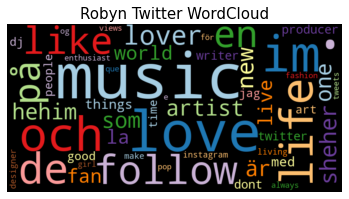

In [43]:
twi_robyn_wrdcld = count_words(robyn_twitter)
wordcloud(twi_robyn_wrdcld['freq'], max_words=50)
plt.title('Robyn Twitter WordCloud', size = 15)

Text(0.5, 1.0, 'Cher Twitter WordCloud')

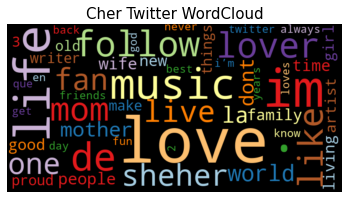

In [44]:
twi_cher_wrdcld = count_words(cher_twitter)
wordcloud(twi_cher_wrdcld['freq'], max_words=50)
plt.title('Cher Twitter WordCloud', size = 15)

Text(0.5, 1.0, 'Robyn Lyrics WordCloud')

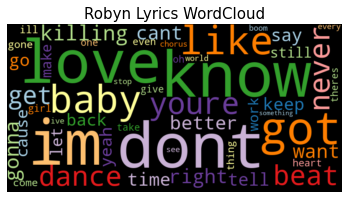

In [45]:
ly_robyn_wrdcld = count_words(set1_robyn)
wordcloud(ly_robyn_wrdcld['freq'], max_words=50)
plt.title('Robyn Lyrics WordCloud', size = 15)

Text(0.5, 1.0, 'Cher Lyrics WordCloud')

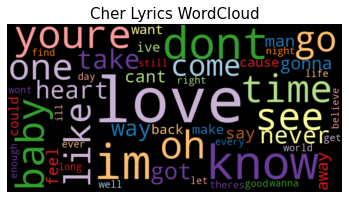

In [46]:
ly_cher_wrdcld = count_words(set2_cher)
wordcloud(ly_cher_wrdcld['freq'], max_words=50)
plt.title('Cher Lyrics WordCloud', size = 15)

**Q: What observations do you have about these (relatively straightforward) wordclouds?**

**A:** The word is bigger when the occurence of word in higher. I can see the word "love" seems to have relative higher frequency in all four corpora. 